In [32]:
%matplotlib notebook
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [19]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/sqlite_tpch1_flip_heap_{0:g}_results.sqlite'.format(x))), vals))
# dfs

In [20]:
for val in vals:
    dfs[val]['rate'] = val

In [21]:
merged_df = pd.concat(list(dfs.values()))
# merged_df

In [22]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')

for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
# df

In [34]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,92551,281,4450,210,8
0.178,89420,434,7231,408,7
0.310,83396,714,12794,583,13
0.562,75120,1044,20419,894,23
1.000,64183,1482,30547,1249,39
1.778,48729,1874,45087,1763,47
3.162,34849,1895,58442,2231,83
5.623,6874,1045,86546,2914,121
10.000,912,305,92997,3131,155


In [36]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     ok &  incorrect &  crash &  abnormal &  timeout \\
rate    &        &            &        &           &          \\
\midrule
0.100   &  92551 &        281 &   4450 &       210 &        8 \\
0.178   &  89420 &        434 &   7231 &       408 &        7 \\
0.310   &  83396 &        714 &  12794 &       583 &       13 \\
0.562   &  75120 &       1044 &  20419 &       894 &       23 \\
1.000   &  64183 &       1482 &  30547 &      1249 &       39 \\
1.778   &  48729 &       1874 &  45087 &      1763 &       47 \\
3.162   &  34849 &       1895 &  58442 &      2231 &       83 \\
5.623   &   6874 &       1045 &  86546 &      2914 &      121 \\
10.000  &    912 &        305 &  92997 &      3131 &      155 \\
17.783  &     23 &         32 &  94187 &      3126 &      132 \\
31.622  &      0 &          7 &  94230 &      3120 &      143 \\
56.234  &      0 &          5 &  94394 &      2983 &      118 \\
100.000 &      0 &          3 &  94624 &      2786 & 

<IPython.core.display.Javascript object>


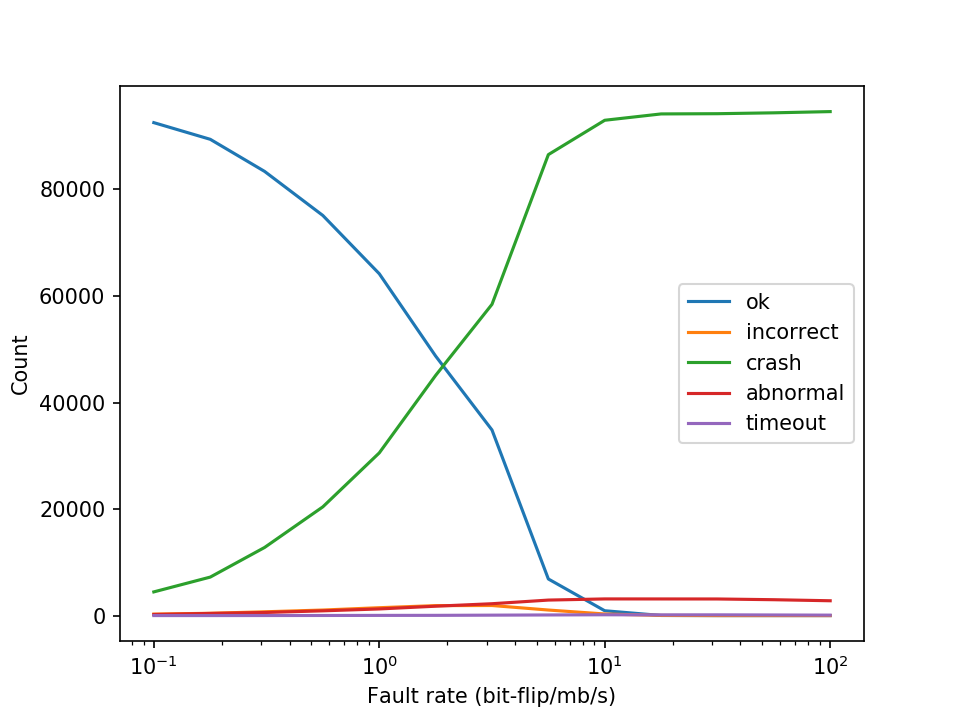

In [28]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


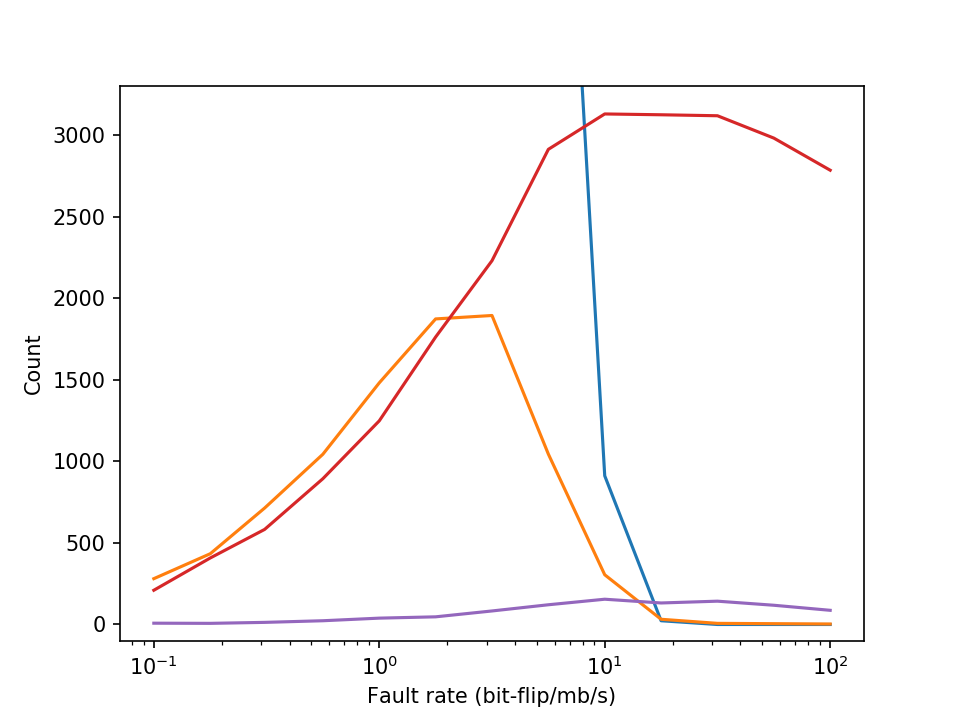

In [31]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.ylim(-100, 3300)
plt.show()

<IPython.core.display.Javascript object>


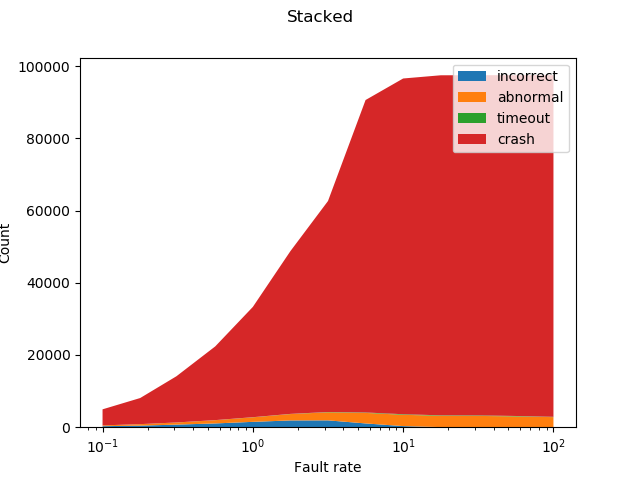

In [8]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


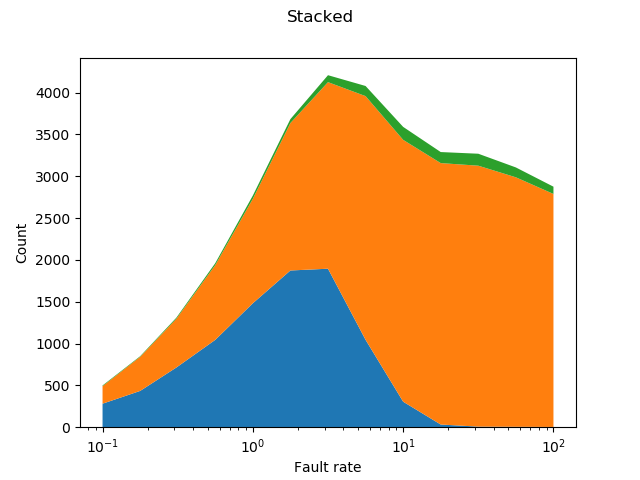

In [11]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


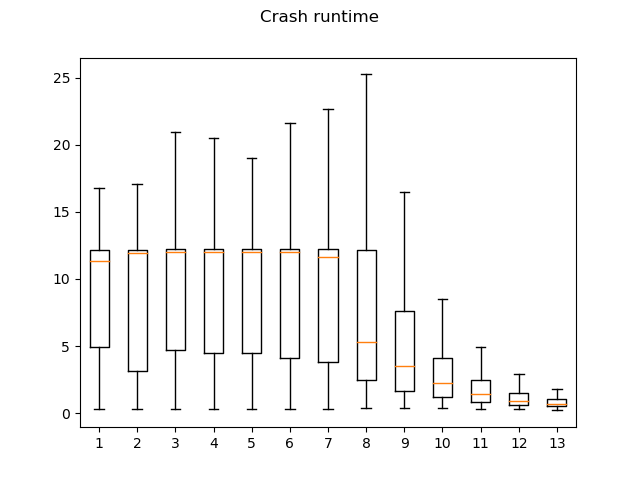

In [9]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


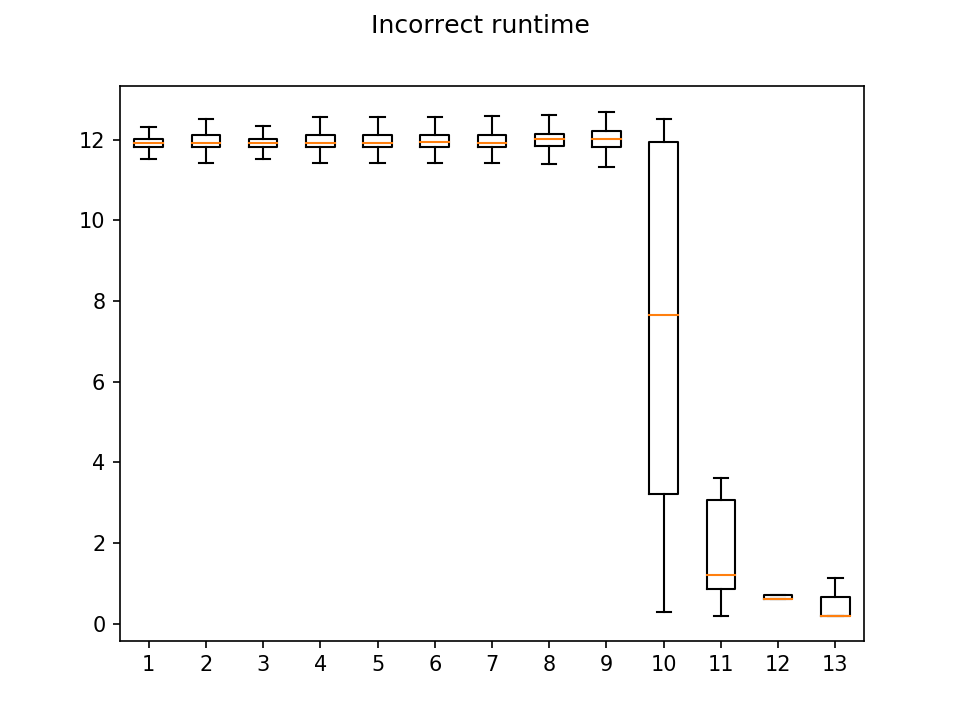

In [65]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


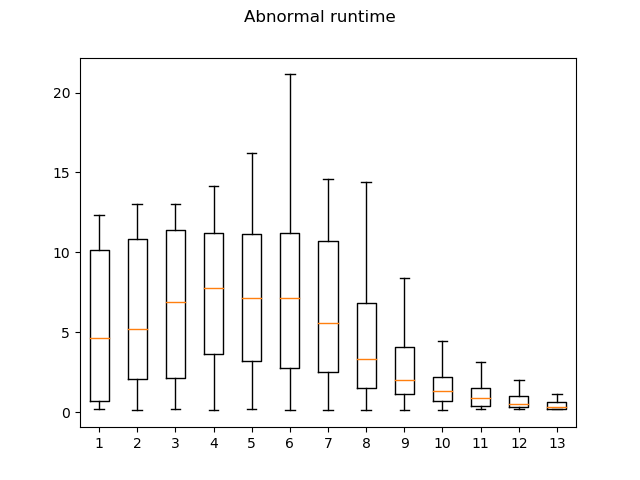

In [10]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


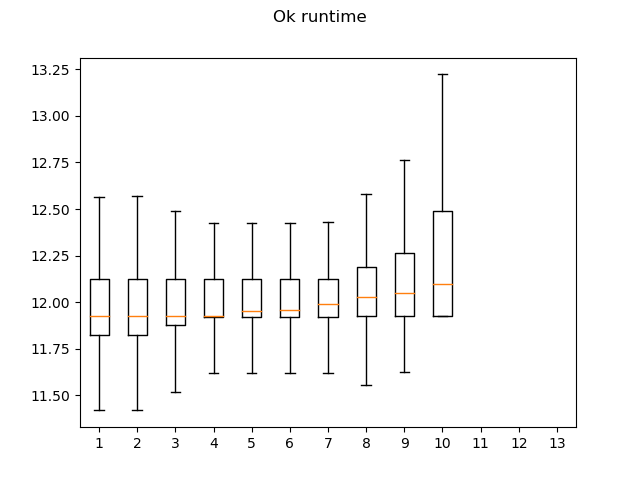

In [14]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [11]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,6,7,8,11
rate,,,,,
0.100,0,753,0,52,3645
0.178,2,1191,0,76,5962
0.310,0,2069,1,107,10617
0.562,0,3314,4,165,16936
1.000,1,4732,1,222,25591
1.778,2,6668,7,408,38002
3.162,3,8100,4,524,49811
5.623,4,8054,6,1046,77436
10.000,4,4940,6,1263,86784


<IPython.core.display.Javascript object>


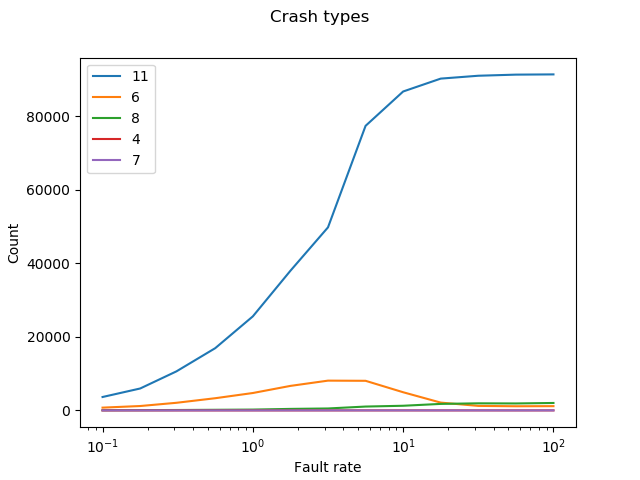

In [12]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()